<a href="https://colab.research.google.com/github/gomdoori/AI/blob/main/(%E1%84%89%E1%85%B5%E1%86%AB%E1%84%80%E1%85%A7%E1%86%BC%E1%84%86%E1%85%A1%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1)Numerical_Deeplearning_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('drive/MyDrive/Colab Notebooks/Numerical_DL_Data/backpropagation_ex2.xlsx')

In [ ]:
data = np.array(data)

In [ ]:
X = data[:,0:2]
Y = data[:,2:3]

In [ ]:
X = (X - np.min(X,axis=0))/(np.max(X,axis=0) - np.min(X,axis=0))

In [ ]:
def get_mini_batches(x, y, batch_size):
    N = x.shape[0]  # 전체 데이터 개수
    mini_batches = []  # 미니배치를 저장할 리스트

    # 데이터를 랜덤하게 섞음
    permutation = list(np.random.permutation(N))
    shuffled_X = x[permutation]
    shuffled_Y = y[permutation]

    # 미니배치로 나누기
    num_complete_batches = N // batch_size  # 미니배치로 완전히 나눠지는 경우의 수
    for k in range(num_complete_batches):
        mini_batch_X = shuffled_X[k * batch_size: (k + 1) * batch_size]
        mini_batch_Y = shuffled_Y[k * batch_size: (k + 1) * batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # 나머지 데이터 처리
    if N % batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_batches * batch_size:]
        mini_batch_Y = shuffled_Y[num_complete_batches * batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [ ]:
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
alpha = 0.01

In [ ]:
# 3층 신경망 클래스
# ReLU 활성화 함수
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


class Three_NN_relu:
    def __init__(self):
        # 가중치 초기화

        self.W1 = np.random.randn(2, 3)
        self.W2 = np.random.randn(3, 2)
        self.W3 = np.random.randn(2, 1)

        self.B1 = np.random.randn(1, 3)
        self.B2 = np.random.randn(1, 2)
        self.B3 = np.random.randn(1, 1)

        self.r_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.r_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.r_W3, self.v_W3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
        self.r_B1, self.v_B1 = np.zeros_like(self.B1), np.zeros_like(self.B1)
        self.r_B2, self.v_B2 = np.zeros_like(self.B2), np.zeros_like(self.B2)
        self.r_B3, self.v_B3 = np.zeros_like(self.B3), np.zeros_like(self.B3)

        self.t = 0

    def forward(self, x):
        # 순방향 전파
        self.A1 = np.dot(x, self.W1) + self.B1
        self.Z1 = relu(self.A1)
        self.A2 = np.dot(self.Z1, self.W2) + self.B2
        self.Z2 = relu(self.A2)
        self.Y_hat = np.dot(self.Z2, self.W3) + self.B3
        return self.Y_hat

    def backward(self, x, y):
        # 오차역전파
        self.t += 1
        N = len(x)

        deri_Loss = self.Y_hat - y
        dW3 = (2 / N) * np.dot(self.Z2.T, deri_Loss)
        db3 = (2 / N) * np.sum(deri_Loss, axis=0)

        deri_a2 = np.dot(deri_Loss, self.W3.T) * relu_derivative(self.A2)
        dW2 = (2 / N) * np.dot(self.Z1.T, deri_a2)
        db2 = (2 / N) * np.sum(deri_a2, axis=0)

        deri_a1 = np.dot(deri_a2, self.W2.T) * relu_derivative(self.A1)
        dW1 = (2 / N) * np.dot(x.T, deri_a1)
        db1 = (2 / N) * np.sum(deri_a1, axis=0)

        # 가중치 업데이트

        self.v_W3 = beta1 * self.v_W3 + (1 - beta1) * dW3
        self.r_W3 = beta2 * self.r_W3 + (1 - beta2) * (dW3 ** 2)
        v_hat_W3 = self.v_W3 / (1 - beta1 ** self.t)
        r_hat_W3 = self.r_W3 / (1 - beta2 ** self.t)
        self.W3 -= alpha * v_hat_W3 / (np.sqrt(r_hat_W3) + epsilon)

        self.v_W2 = beta1 * self.v_W2 + (1 - beta1) * dW2
        self.r_W2 = beta2 * self.r_W2 + (1 - beta2) * (dW2 ** 2)
        v_hat_W2 = self.v_W2 / (1 - beta1 ** self.t)
        r_hat_W2 = self.r_W2 / (1 - beta2 ** self.t)
        self.W2 -= alpha * v_hat_W2 / (np.sqrt(r_hat_W2) + epsilon)

        self.v_W1 = beta1 * self.v_W1 + (1 - beta1) * dW1
        self.r_W1 = beta2 * self.r_W1 + (1 - beta2) * (dW1 ** 2)
        v_hat_W1 = self.v_W1 / (1 - beta1 ** self.t)
        r_hat_W1 = self.r_W1 / (1 - beta2 ** self.t)
        self.W1 -= alpha * v_hat_W1 / (np.sqrt(r_hat_W1) + epsilon)

        self.v_B3 = beta1 * self.v_B3 + (1 - beta1) * db3
        self.r_B3 = beta2 * self.r_B3 + (1 - beta2) * (db3 ** 2)
        v_hat_B3 = self.v_B3 / (1 - beta1 ** self.t)
        r_hat_B3 = self.r_B3 / (1 - beta2 ** self.t)
        self.B3 -= alpha * v_hat_B3 / (np.sqrt(r_hat_B3) + epsilon)

        self.v_B2 = beta1 * self.v_B2 + (1 - beta1) * db2
        self.r_B2 = beta2 * self.r_B2 + (1 - beta2) * (db2 ** 2)
        v_hat_B2 = self.v_B2 / (1 - beta1 ** self.t)
        r_hat_B2 = self.r_B2 / (1 - beta2 ** self.t)
        self.B2 -= alpha * v_hat_B2 / (np.sqrt(r_hat_B2) + epsilon)

        self.v_B1 = beta1 * self.v_B1 + (1 - beta1) * db1
        self.r_B1 = beta2 * self.r_B1 + (1 - beta2) * (db1 ** 2)
        v_hat_B1 = self.v_B1 / (1 - beta1 ** self.t)
        r_hat_B1 = self.r_B1 / (1 - beta2 ** self.t)
        self.B1 -= alpha * v_hat_B1 / (np.sqrt(r_hat_B1) + epsilon)

In [ ]:
batch_size = 16
np.random.seed(0)
mini_batches = get_mini_batches(X, Y, batch_size)
model_relu = Three_NN_relu()

In [ ]:
loss_record_relu = []
epochs = 5000

for epoch in range(epochs):
    for mini_batch in mini_batches:
        mini_batch_X, mini_batch_Y = mini_batch
        mini_Y_hat = model_relu.forward(mini_batch_X)
        model_relu.backward(mini_batch_X,mini_batch_Y)

    Y_hat = model_relu.forward(X)
    Loss = np.sum(np.square(Y_hat - Y))/len(X)
    loss_record_relu.append(Loss)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch} of {epochs}')
        print(f'train loss: {Loss:.8f}')

Epoch 0 of 5000
train loss: 29.22532193
Epoch 1000 of 5000
train loss: 0.01677347
Epoch 2000 of 5000
train loss: 0.01672045
Epoch 3000 of 5000
train loss: 0.01668317
Epoch 4000 of 5000
train loss: 0.01665619


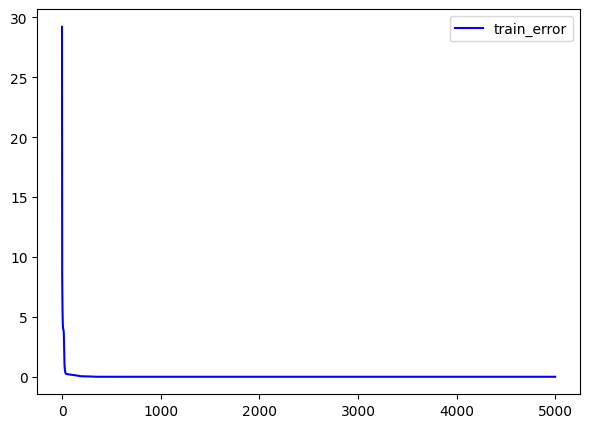

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(loss_record_relu,'b',label='train_error')
plt.legend()
plt.show()

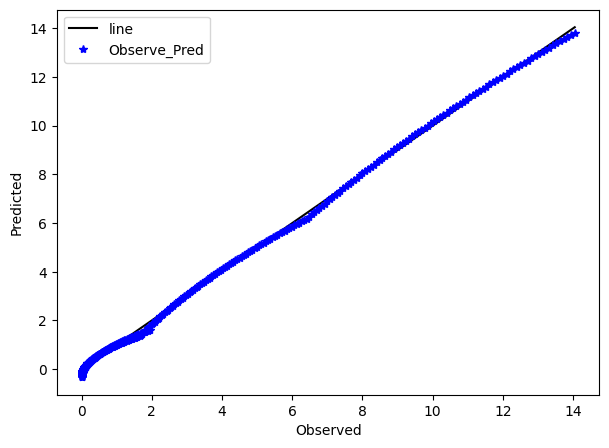

In [ ]:
plt.figure(figsize = (7,5))
x_t = np.linspace(0,np.max(Y),100)
y_t = x_t
plt.plot(x_t,y_t,'-k',label='line')
plt.plot(Y,Y_hat,'*b',label='Observe_Pred')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend()
plt.show()